In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns # 시각화 라이브러리
import warnings # 경고창 없애기
import matplotlib.pyplot as pit
import matplotlib.pyplot as pit
import seaborn as sns
warnings.filterwarnings('ignore')

In [86]:
train = pd.read_excel('./apt_list.xlsx')

In [87]:
train.keys()

Index(['거래금액', '건축년도', '년', '도로명', '도로명건물본번호코드', '도로명건물부번호코드', '도로명시군구코드',
       '도로명일련번호코드', '도로명지상지하코드', '도로명코드', '법정동', '법정동본번코드', '법정동부번코드',
       '법정동시군구코드', '법정동읍면동코드', '법정동지번코드', '아파트', '월', '일', '일련번호', '전용면적',
       '지번', '지역코드', '층', '해제사유발생일', '해제여부'],
      dtype='object')

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   거래금액        990 non-null    object 
 1   건축년도        990 non-null    int64  
 2   년           990 non-null    int64  
 3   도로명         990 non-null    object 
 4   도로명건물본번호코드  990 non-null    int64  
 5   도로명건물부번호코드  990 non-null    int64  
 6   도로명시군구코드    990 non-null    int64  
 7   도로명일련번호코드   990 non-null    int64  
 8   도로명지상지하코드   990 non-null    int64  
 9   도로명코드       990 non-null    int64  
 10  법정동         990 non-null    object 
 11  법정동본번코드     990 non-null    int64  
 12  법정동부번코드     990 non-null    int64  
 13  법정동시군구코드    990 non-null    int64  
 14  법정동읍면동코드    990 non-null    int64  
 15  법정동지번코드     990 non-null    int64  
 16  아파트         990 non-null    object 
 17  월           990 non-null    int64  
 18  일           990 non-null    int64  
 19  일련번호        792 non-null    o

In [89]:
train = train.drop(["도로명건물본번호코드","아파트", "법정동","월","년","일","지번","지역코드", "도로명", "도로명건물부번호코드", "도로명시군구코드", "도로명일련번호코드", "도로명지상지하코드", "도로명코드", "법정동본번코드", "법정동부번코드", "법정동시군구코드", "법정동읍면동코드", "법정동지번코드", "일련번호", "해제사유발생일", "해제여부"], axis =1,)

In [90]:
train

,거래금액,건축년도,전용면적,층
0,"8,650",2011,29.8170,7
1,"36,400",2007,84.8686,11
2,"36,440",2020,59.9048,11
3,"14,900",2016,49.9310,5
4,"59,000",2020,84.9490,12
...,...,...,...,...
985,"37,450",2007,84.8686,11
986,"38,200",2007,84.8686,17
987,"35,300",2007,84.8686,8
988,"35,450",1996,84.9300,3


In [91]:
train['거래금액'] = train['거래금액'].str.replace(",", "")

In [92]:
X_train = train[:750] # 1~750
X_test = train[750:] # 751 ~990
y_train = train[["거래금액"]][:750] # 1~ 750
y_test = train[["거래금액"]][750:] # 751 ~990

In [93]:
y_test['거래금액'] = y_test['거래금액'].str.replace(",", "")

In [94]:
X_train

,거래금액,건축년도,전용면적,층
0,8650,2011,29.8170,7
1,36400,2007,84.8686,11
2,36440,2020,59.9048,11
3,14900,2016,49.9310,5
4,59000,2020,84.9490,12
...,...,...,...,...
745,37450,2007,84.8686,11
746,38200,2007,84.8686,17
747,35300,2007,84.8686,8
748,35450,1996,84.9300,3


In [95]:
y_test

,거래금액
750,8650
751,36400
752,36440
753,14900
754,59000
...,...
985,37450
986,38200
987,35300
988,35450


In [96]:
y_train

,거래금액
0,8650
1,36400
2,36440
3,14900
4,59000
...,...
745,37450
746,38200
747,35300
748,35450


In [97]:
y_test

,거래금액
750,8650
751,36400
752,36440
753,14900
754,59000
...,...
985,37450
986,38200
987,35300
988,35450


#  데이터 전처리

## 전용면적

In [98]:
X_train['전용면적'].describe()

count    750.000000
mean      76.281680
std       22.319152
min       29.817000
25%       59.904800
50%       84.868600
75%       84.930000
max      113.810600
Name: 전용면적, dtype: float64

In [99]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [21, 30, 60, 85,114]
# labels 구간별 명칭
labels = [1000,2000,3000,4000]
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
X_train_cut = pd.cut(train['전용면적'], bins = bins, labels = labels)
X_train['area_group'] = X_train_cut
X_test_cut = pd.cut(X_test['전용면적'], bins = bins, labels = labels)
X_test['area_group'] = X_test_cut

In [100]:
X_train["area_group"].value_counts()

3000    450
2000    150
4000     75
1000     75
Name: area_group, dtype: int64

In [101]:
X_test["area_group"].value_counts()

3000    144
2000     48
4000     24
1000     24
Name: area_group, dtype: int64

## 건축년도

In [102]:
X_train['건축년도'].describe()

count     750.000000
mean     2009.800000
std         6.915473
min      1996.000000
25%      2007.000000
50%      2007.000000
75%      2016.000000
max      2020.000000
Name: 건축년도, dtype: float64

In [103]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [1995, 2000, 2005, 2010, 2015, 2021]
# labels 구간별 명칭
labels = [1000,2000, 2500, 3000, 5000]
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
X_train_cut = pd.cut(train['건축년도'], bins = bins, labels = labels)
X_train['arch_group'] = X_train_cut
X_test_cut = pd.cut(X_test['건축년도'], bins = bins, labels = labels)
X_test['arch_group'] = X_test_cut

In [104]:
X_train['arch_group'].value_counts()

2500    375
5000    225
3000     75
1000     75
2000      0
Name: arch_group, dtype: int64

In [105]:
X_test['arch_group'].value_counts()

2500    120
5000     72
3000     24
1000     24
2000      0
Name: arch_group, dtype: int64

## 층

In [106]:
X_train['층'].describe()

count    750.000000
mean       9.900000
std        3.988886
min        3.000000
25%        7.000000
50%       11.000000
75%       12.000000
max       17.000000
Name: 층, dtype: float64

In [107]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [0, 5, 10, 15, 20, 50]
# labels 구간별 명칭
labels = [1000, 1500, 2000, 4000, 7000]
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
X_train_cut = pd.cut(train['층'], bins = bins, labels = labels)
X_train['layer_group'] = X_train_cut
X_test_cut = pd.cut(X_test['층'], bins = bins, labels = labels)
X_test['layer_group'] = X_test_cut

In [108]:
X_train['layer_group'].value_counts()

2000    375
1500    150
1000    150
4000     75
7000      0
Name: layer_group, dtype: int64

In [109]:
X_test['layer_group'].value_counts()

2000    120
1500     48
1000     48
4000     24
7000      0
Name: layer_group, dtype: int64

# 컬럼정리

In [110]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((750, 7), (750, 1), (240, 7), (240, 1))

In [111]:
X_train

,거래금액,건축년도,전용면적,층,area_group,arch_group,layer_group
0,8650,2011,29.8170,7,1000,3000,1500
1,36400,2007,84.8686,11,3000,2500,2000
2,36440,2020,59.9048,11,2000,5000,2000
3,14900,2016,49.9310,5,2000,5000,1000
4,59000,2020,84.9490,12,3000,5000,2000
...,...,...,...,...,...,...,...
745,37450,2007,84.8686,11,3000,2500,2000
746,38200,2007,84.8686,17,3000,2500,4000
747,35300,2007,84.8686,8,3000,2500,1500
748,35450,1996,84.9300,3,3000,1000,1000


In [112]:
X_train.drop(['건축년도', '전용면적', '층'], axis = 1, inplace = True)
X_test.drop(['건축년도', '전용면적', '층'], axis = 1, inplace = True)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [114]:
X_train.drop(["거래금액"], axis = 1, inplace = True)
X_test.drop(["거래금액"], axis = 1, inplace = True)

In [115]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 6)

In [116]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [117]:
tree_model.score(X_train, y_train)

0.9

In [118]:
tree_model.score(X_test,y_test)

0.9

In [119]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [120]:
# 검증 데이터 만들기(validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 5)

In [121]:
train_score_list = []
val_score_list = []

for md in range(1,25) : # 트리 모델이 단순 -> 복잡
    t_model = DecisionTreeClassifier(max_depth=md)
    t_model.fit(X_train,y_train)
    
    train_score = t_model.score(X_train,y_train)
    val_score = t_model.score(X_val,y_val)
    
    train_score_list.append(train_score)
    val_score_list.append(val_score)

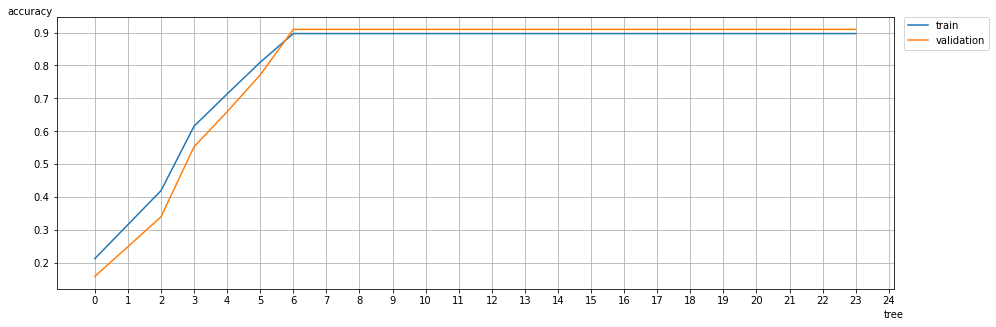

In [122]:
plt.figure(figsize=(15,5)) # 가로,세로
plt.plot(train_score_list,label='train')
plt.plot(val_score_list,label='validation')
plt.xticks(range(0,25))
plt.legend(loc = "upper right", bbox_to_anchor = (1.12,1.02)) # 범례
plt.xlabel('tree', position =(1,0))
plt.ylabel('accuracy', rotation = 0, position = (1,1))
plt.grid()
plt.show()

In [123]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [124]:
final_tree = DecisionTreeClassifier(max_depth = 7)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [125]:
final_pre = final_tree.predict(X_test)

In [126]:
final_tree.score(X_train, y_train)

0.9

In [127]:
final_tree.score(X_test, y_test)

0.9

In [128]:
X_test

,area_group,arch_group,layer_group
750,1000,3000,1500
751,3000,2500,2000
752,2000,5000,2000
753,2000,5000,1000
754,3000,5000,2000
...,...,...,...
985,3000,2500,2000
986,3000,2500,4000
987,3000,2500,1500
988,3000,1000,1000


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [130]:
gb = GradientBoostingClassifier(random_state=2,learning_rate=0.19
                                ,max_depth=5)
gb.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.3f}".format(gb.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gb.score(X_val,y_val)))

훈련 세트 정확도 : 0.900
테스트 세트 정확도 : 0.910


In [131]:
gb.predict(X_test)

array(['8650', '36400', '36440', '14900', '59000', '36400', '38200',
       '35300', '35450', '53000', '8650', '36400', '36440', '14900',
       '59000', '36400', '38200', '35300', '35450', '53000', '8650',
       '36400', '36440', '14900', '59000', '36400', '38200', '35300',
       '35450', '53000', '8650', '36400', '36440', '14900', '59000',
       '36400', '38200', '35300', '35450', '53000', '8650', '36400',
       '36440', '14900', '59000', '36400', '38200', '35300', '35450',
       '53000', '8650', '36400', '36440', '14900', '59000', '36400',
       '38200', '35300', '35450', '53000', '8650', '36400', '36440',
       '14900', '59000', '36400', '38200', '35300', '35450', '53000',
       '8650', '36400', '36440', '14900', '59000', '36400', '38200',
       '35300', '35450', '53000', '8650', '36400', '36440', '14900',
       '59000', '36400', '38200', '35300', '35450', '53000', '8650',
       '36400', '36440', '14900', '59000', '36400', '38200', '35300',
       '35450', '53000', '8650

In [132]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=1000,oob_score = True, 
                            random_state =4)
bagging.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.3f}".format(bagging.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(X_val,y_val)))

훈련 세트 정확도 : 0.900
테스트 세트 정확도 : 0.915


In [133]:
bagging.predict(X_test)

array(['8650', '37450', '36440', '14900', '59000', '37450', '38200',
       '35300', '35450', '53000', '8650', '37450', '36440', '14900',
       '59000', '37450', '38200', '35300', '35450', '53000', '8650',
       '37450', '36440', '14900', '59000', '37450', '38200', '35300',
       '35450', '53000', '8650', '37450', '36440', '14900', '59000',
       '37450', '38200', '35300', '35450', '53000', '8650', '37450',
       '36440', '14900', '59000', '37450', '38200', '35300', '35450',
       '53000', '8650', '37450', '36440', '14900', '59000', '37450',
       '38200', '35300', '35450', '53000', '8650', '37450', '36440',
       '14900', '59000', '37450', '38200', '35300', '35450', '53000',
       '8650', '37450', '36440', '14900', '59000', '37450', '38200',
       '35300', '35450', '53000', '8650', '37450', '36440', '14900',
       '59000', '37450', '38200', '35300', '35450', '53000', '8650',
       '37450', '36440', '14900', '59000', '37450', '38200', '35300',
       '35450', '53000', '8650

In [134]:
y_test["거래금액"] = ada.predict(X_test)

In [135]:
y_test["거래금액"].to_csv('price.csv', index = False)

# LinearRegression

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
linear_model = LinearRegression()

In [138]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [139]:
print('train score : ', linear_model.score(X_train,y_train))
print('test score : ', linear_model.score(X_test,y_test))

train score :  0.7936784622123862
test score :  -0.6961268972577785


In [150]:
y_test["거래금액"] = linear_model.predict(X_test)

In [152]:
y_test["거래금액"] = y_test["거래금액"].apply(int)

In [153]:
y_test["거래금액"].to_csv('price.csv', index = False)

# Lasso

In [154]:
from sklearn.linear_model import Lasso

In [155]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train,y_train)
print('train score : ', lasso_model.score(X_train,y_train))
print('test score : ', lasso_model.score(X_test,y_test))

train score :  0.7936784622123646
test score :  0.9999999978574696


In [156]:
for i in range(1,15) :
    lasso_model = Lasso(alpha = i)   
    lasso_model.fit(X_train,y_train)
    
    train_score = lasso_model.score(X_train,y_train)
    test_score = lasso_model.score(X_test,y_test)
    print("test_size가 {}일 때 train은 {}이고 test는 {}이다".format(i,train_score,test_score))

test_size가 1일 때 train은 0.7936784622123646이고 test는 0.9999999978574696이다
test_size가 2일 때 train은 0.7936784622122999이고 test는 0.9999999978618273이다
test_size가 3일 때 train은 0.7936784622121928이고 test는 0.9999999978661309이다
test_size가 4일 때 train은 0.7936784622120355이고 test는 0.9999999978704895이다
test_size가 5일 때 train은 0.7936784622118409이고 test는 0.9999999978746833이다
test_size가 6일 때 train은 0.7936784622116039이고 test는 0.9999999978788233이다
test_size가 7일 때 train은 0.7936784622113239이고 test는 0.9999999978829095이다
test_size가 8일 때 train은 0.7936784622110012이고 test는 0.9999999978869417이다
test_size가 9일 때 train은 0.7936784622106358이고 test는 0.9999999978909202이다
test_size가 10일 때 train은 0.7936784622102276이고 test는 0.9999999978948448이다
test_size가 11일 때 train은 0.7936784622097767이고 test는 0.9999999978987157이다
test_size가 12일 때 train은 0.7936784622092832이고 test는 0.9999999979025327이다
test_size가 13일 때 train은 0.7936784622087469이고 test는 0.9999999979062958이다
test_size가 14일 때 train은 0.793678462208168이고 test는 0.9999999979100052이다


In [157]:
lasso_model.coef_ #182개 특성이 사용한 가중치 값

array([16.88508964,  3.8770143 ,  2.05865878])

In [158]:
# False = 가중치 0
# True = 가중치가 0이 아님
lasso_model.coef_!=0

array([ True,  True,  True])

In [159]:
# True의 갯수를 세줌
np.sum(lasso_model.coef_!=0)

3

In [160]:
lasso_model = Lasso(alpha = 0.001)
lasso_model.fit(X_train,y_train)
print('train score : ', lasso_model.score(X_train,y_train))
print('test score : ', lasso_model.score(X_test,y_test))
print('사용한 특성의 개수 : ',np.sum(lasso_model.coef_!=0))

train score :  0.7936784622123864
test score :  0.9999999978530337
사용한 특성의 개수 :  3


In [161]:
lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(X_train,y_train)
print('train score : ', lasso_model.score(X_train,y_train))
print('test score : ', lasso_model.score(X_test,y_test))
print('사용한 특성의 개수 : ',np.sum(lasso_model.coef_!=0))

train score :  0.7936784622123865
test score :  0.9999999978530738
사용한 특성의 개수 :  3


In [163]:
y_test["거래금액"] = lasso_model.predict(X_test)

In [164]:
y_test["거래금액"] = y_test["거래금액"].apply(int)

In [165]:
y_test["거래금액"].to_csv('price.csv', index = False)

# Ridge

In [167]:
from sklearn.linear_model import Ridge

In [168]:
ridge_model = Ridge(alpha = 0.001)
ridge_model.fit(X_train,y_train)
print('train score : ', ridge_model.score(X_train,y_train))
print('test score : ', ridge_model.score(X_test,y_test))
print('사용한 특성의 개수 : ',np.sum(ridge_model.coef_!=0))

train score :  0.7936784622123862
test score :  0.9999999978530293
사용한 특성의 개수 :  3


In [169]:
ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(X_train,y_train)
print('train score : ', ridge_model.score(X_train,y_train))
print('test score : ', ridge_model.score(X_test,y_test))
print('사용한 특성의 개수 : ',np.sum(ridge_model.coef_!=0))

train score :  0.7936784622123861
test score :  0.9999999978530296
사용한 특성의 개수 :  3


In [170]:
ridge_model = Ridge(alpha = 3)
ridge_model.fit(X_train,y_train)
print('train score : ', ridge_model.score(X_train,y_train))
print('test score : ', ridge_model.score(X_test,y_test))
print('사용한 특성의 개수 : ',np.sum(ridge_model.coef_!=0))

train score :  0.7936784622123864
test score :  0.9999999978531598
사용한 특성의 개수 :  3


In [171]:
ridge_model.predict(X_test)

array([[ 5369.27390253],
       [38230.3335739 ],
       [31037.78978092],
       [28979.11539718],
       [47922.90851476],
       [38230.3335739 ],
       [42347.68234138],
       [37200.99638203],
       [30356.11422565],
       [55115.45230774],
       [ 5369.27390253],
       [38230.3335739 ],
       [31037.78978092],
       [28979.11539718],
       [47922.90851476],
       [38230.3335739 ],
       [42347.68234138],
       [37200.99638203],
       [30356.11422565],
       [55115.45230774],
       [ 5369.27390253],
       [38230.3335739 ],
       [31037.78978092],
       [28979.11539718],
       [47922.90851476],
       [38230.3335739 ],
       [42347.68234138],
       [37200.99638203],
       [30356.11422565],
       [55115.45230774],
       [ 5369.27390253],
       [38230.3335739 ],
       [31037.78978092],
       [28979.11539718],
       [47922.90851476],
       [38230.3335739 ],
       [42347.68234138],
       [37200.99638203],
       [30356.11422565],
       [55115.45230774],
